### Importing Liberaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
plt.style.use('Solarize_Light2')

### loading dataset 

In [2]:
X,y=make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

In [3]:
X.shape

(500, 2)

In [4]:
X[0]

array([-6.94238952, -6.8807223 ])

In [5]:
y

array([3, 2, 1, 3, 3, 1, 4, 3, 2, 3, 2, 1, 2, 3, 1, 3, 2, 3, 3, 2, 0, 0,
       3, 1, 3, 0, 4, 4, 1, 4, 3, 4, 0, 0, 3, 0, 2, 2, 3, 0, 0, 0, 4, 4,
       1, 2, 2, 1, 4, 4, 2, 3, 4, 3, 3, 0, 3, 3, 2, 1, 2, 1, 1, 3, 4, 2,
       1, 1, 0, 1, 0, 3, 0, 3, 0, 1, 3, 4, 0, 0, 1, 0, 1, 4, 2, 4, 1, 2,
       4, 1, 4, 0, 3, 0, 0, 2, 3, 1, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 1, 3,
       2, 4, 3, 2, 1, 0, 2, 4, 0, 1, 2, 1, 4, 3, 0, 4, 4, 4, 3, 3, 1, 1,
       3, 2, 2, 4, 1, 4, 1, 3, 3, 0, 1, 2, 4, 3, 2, 2, 3, 1, 3, 3, 1, 1,
       2, 0, 0, 4, 1, 3, 0, 2, 4, 0, 2, 0, 2, 0, 0, 0, 4, 3, 0, 2, 0, 4,
       3, 1, 2, 4, 2, 3, 2, 0, 4, 4, 0, 3, 1, 2, 0, 1, 4, 3, 4, 0, 1, 4,
       3, 3, 3, 0, 0, 2, 3, 4, 4, 3, 2, 3, 3, 3, 0, 2, 1, 2, 3, 3, 2, 4,
       1, 4, 4, 0, 3, 1, 3, 1, 4, 0, 1, 1, 3, 0, 3, 0, 1, 2, 1, 0, 0, 2,
       3, 3, 1, 1, 0, 2, 0, 3, 4, 2, 4, 3, 4, 4, 4, 4, 2, 0, 2, 3, 0, 2,
       4, 1, 2, 2, 2, 4, 3, 3, 1, 0, 0, 2, 1, 1, 3, 1, 4, 1, 2, 2, 4, 3,
       0, 4, 4, 2, 0, 3, 1, 0, 1, 4, 1, 1, 2, 3, 0,

Text(0, 0.5, 'Feature 2')

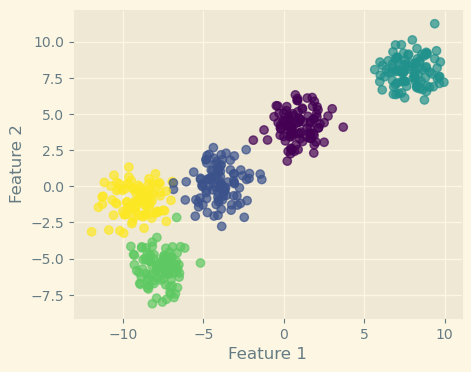

In [6]:
plt.figure(figsize=(5,4))
plt.scatter(X[:,0],X[:,1],alpha=0.7,c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [7]:
# defining value of K and colors
k=5
colors=['green','yellow','blue','cyan','red']

### Step 1 : Randomly initialised centers 

In [8]:
np.random.random(size=X[0].shape)

array([0.24411523, 0.48011217])

In [9]:
-10 + (np.random.random(size=X[0].shape) *(20))

array([-8.42942305, -6.85993627])

In [10]:
clusters = {}
for idx in range(k):
    center  = -10 + (np.random.random(size=X[0].shape) *(20))
    points  = [] 
    cluster = {
        'center' : center,
        'points' : points,
        'color'  : colors[idx]
    }    
    clusters[idx] = cluster
    
clusters
    

{0: {'center': array([ 7.68521872, -2.38519652]),
  'points': [],
  'color': 'green'},
 1: {'center': array([4.28181389, 1.24863055]),
  'points': [],
  'color': 'yellow'},
 2: {'center': array([2.77999394, 9.5133272 ]), 'points': [], 'color': 'blue'},
 3: {'center': array([-8.57791474, -3.70800256]),
  'points': [],
  'color': 'cyan'},
 4: {'center': array([-8.38195578, -0.68702992]),
  'points': [],
  'color': 'red'}}

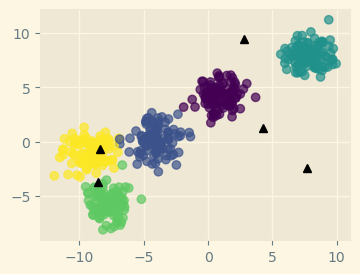

In [11]:
# visualizing the center points in the data
plt.figure(figsize=(4,3))
plt.scatter(X[:,0],X[:,1],alpha=0.7,c=y)
for idx in range(k):
    plt.plot(clusters[idx]['center'][0],clusters[idx]['center'][1],marker='^',color='k')
plt.show()

### Step 2 : Assigning each data point to its nearest center

In [14]:
#creating a distance function
def eclu_distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [15]:
v1=np.array([2.3,4.5])
v2=np.array([3.1,5.9])
print(eclu_distance(v1,v2))

1.6124515496597103


In [16]:
# Implementing the E step
from tqdm import tqdm
def assign_cluster():
    for idx in tqdm(range(X.shape[0])):        
        dist  = []
        cur_x = X[idx]
        for i in range(k):
            distance = eclu_distance(cur_x,clusters[i]['center'])
            dist.append(distance) 
            
        cur_cluster=np.argmin(dist)
        clusters[cur_cluster]['points'].append(cur_x)
        
        
        
assign_cluster()



           

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 6027.75it/s]


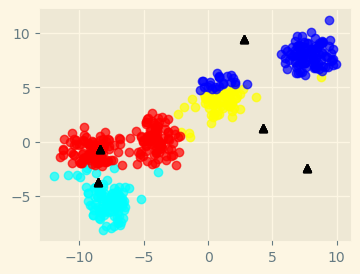

In [17]:
# visualizing the asssigned points in the data
def plot_cluster():
    plt.figure(figsize=(4,3))
    for i in clusters:
        pts = np.array(clusters[i]['points'])
        
        try:
            
            plt.scatter(pts[:,0],pts[:,1],alpha=0.7,c=clusters[i]['color'])
               
        except:    
            pass
        
        for idx in range(k):
             plt.plot(clusters[idx]['center'][0],clusters[idx]['center'][1],marker='^',color='k') 
    plt.show() 
        
        
plot_cluster()

### Step 3 : Updating the center location by taking means

In [18]:
# Implementing M Step
def update_cluster():
    for idx in range(k):
        pts=np.array(clusters[idx]['points'])
        if (pts.shape[0]>0):
            new_center=pts.mean(axis=0)
            clusters[idx]['center']=new_center
            clusters[idx]['points']=[]
update_cluster()            

### Step 4: Repeating the step 2 and 3 untill convergence : 

In [25]:
# main
# defining value of K and colors
k=5
colors=['green','yellow','blue','cyan','red']

clusters = {}
for idx in range(k):
    center  = -10 + (np.random.random(size=X[0].shape) *(20))
    points  = [] 
    cluster = {
        'center' : center,
        'points' : points,
        'color'  : colors[idx]
    }    
    clusters[idx] = cluster
clusters

{0: {'center': array([-7.98819571,  1.86180694]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-2.24901465, -0.71606289]),
  'points': [],
  'color': 'yellow'},
 2: {'center': array([0.09263054, 5.88782904]), 'points': [], 'color': 'blue'},
 3: {'center': array([-0.89894449, -9.67211302]),
  'points': [],
  'color': 'cyan'},
 4: {'center': array([-1.83856284, -4.23704592]),
  'points': [],
  'color': 'red'}}

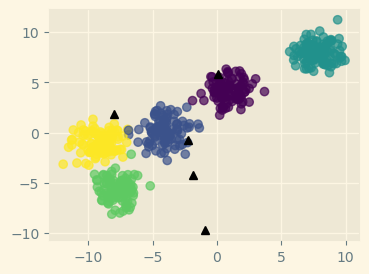

In [26]:
# after random initialisation
plt.figure(figsize=(4,3))
plt.scatter(X[:,0],X[:,1],alpha=0.7,c=y)
for idx in range(k):
    plt.plot(clusters[idx]['center'][0],clusters[idx]['center'][1],marker='^',color='k')
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 4857.28it/s]


iteration  =  0


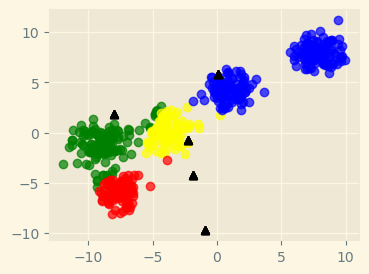

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 6332.76it/s]


iteration  =  1


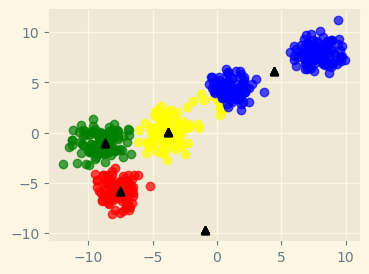

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5211.45it/s]


iteration  =  2


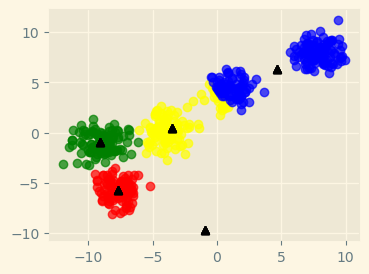

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 6100.95it/s]


iteration  =  3


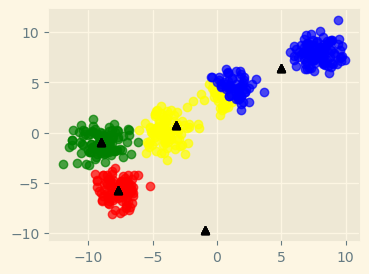

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5558.80it/s]


iteration  =  4


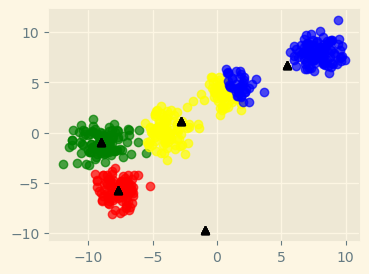

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 6176.52it/s]


iteration  =  5


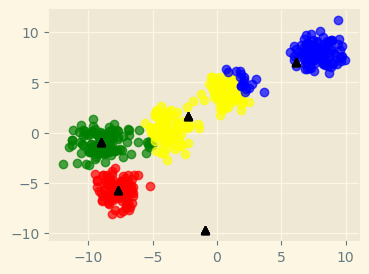

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5750.33it/s]


iteration  =  6


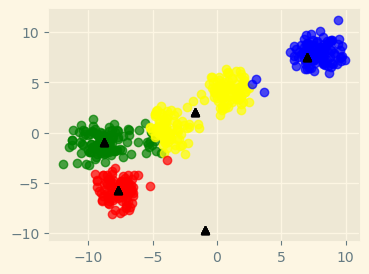

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 7147.05it/s]


iteration  =  7


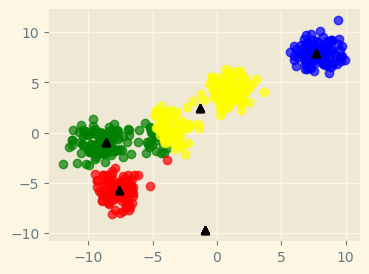

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5750.52it/s]


iteration  =  8


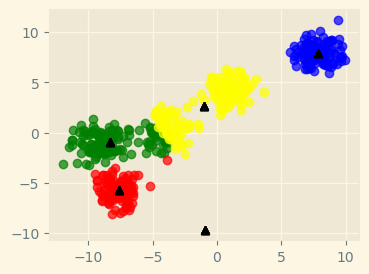

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 7250.51it/s]


iteration  =  9


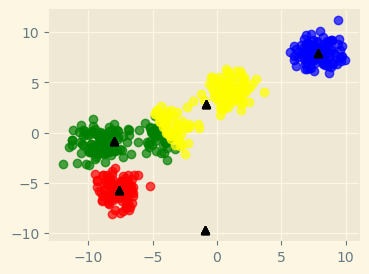

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 6176.41it/s]


iteration  =  10


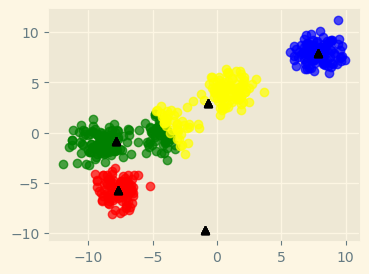

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 4548.13it/s]


iteration  =  11


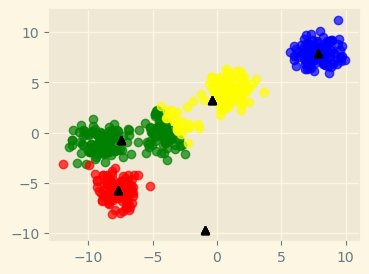

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5322.23it/s]


iteration  =  12


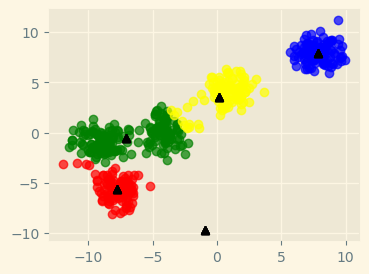

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5322.05it/s]


iteration  =  13


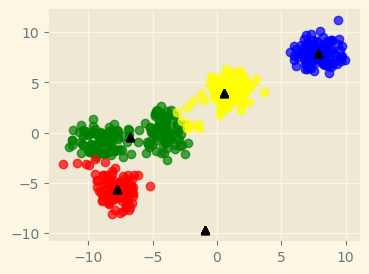

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 4466.78it/s]


iteration  =  14


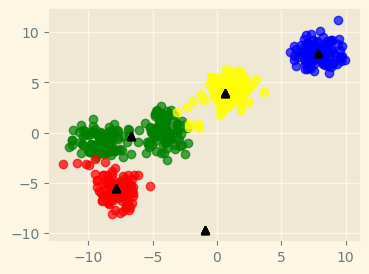

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5053.11it/s]


iteration  =  15


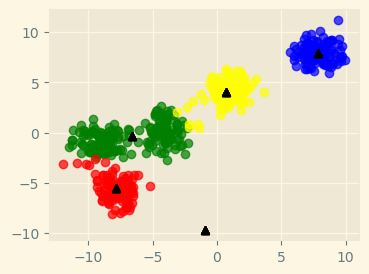

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5558.56it/s]


iteration  =  16


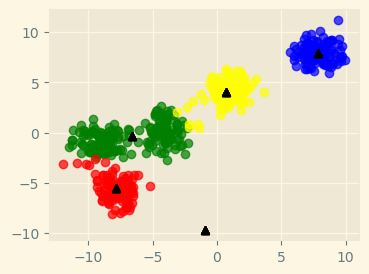

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5621.23it/s]


iteration  =  17


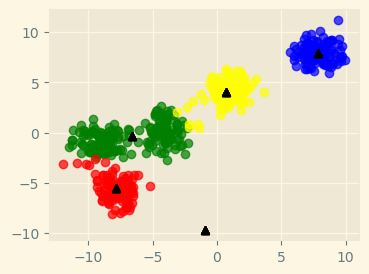

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5211.39it/s]


iteration  =  18


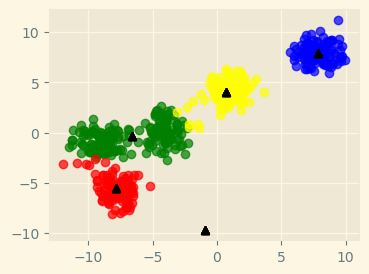

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 6582.87it/s]


iteration  =  19


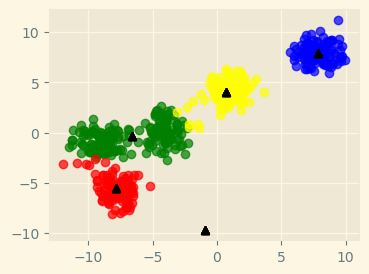

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 6948.42it/s]


iteration  =  20


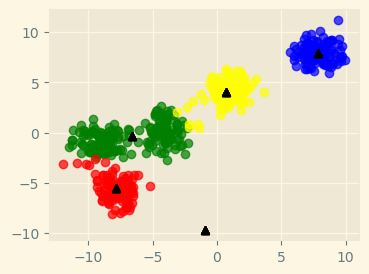

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 6176.43it/s]


iteration  =  21


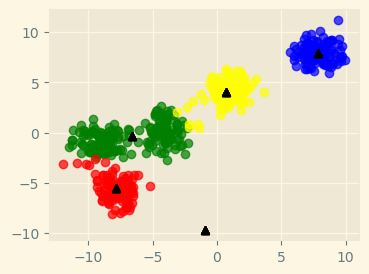

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 7696.68it/s]


iteration  =  22


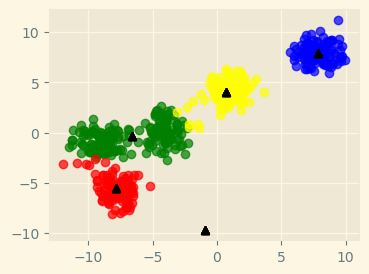

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5002.90it/s]


iteration  =  23


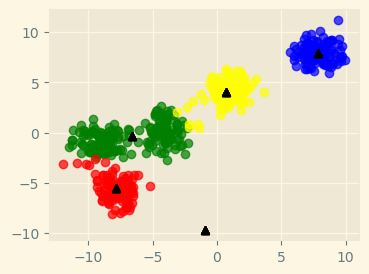

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 7046.36it/s]


iteration  =  24


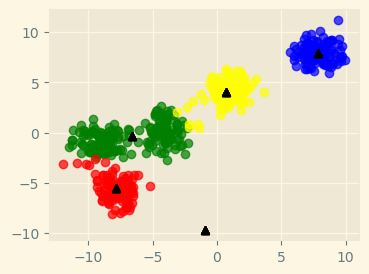

In [27]:
for i in range(25):
    assign_cluster()
    print('iteration  = ',i)
    plot_cluster()
    update_cluster()

Conclusion : Due to random initialiazation of the centers some centers might be assign 0 pts due to its distance 